<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [11]:
import pandas as pd
import unicodedata
import random
from train import training, load_data, evaluate
from util import df_tolist
from sklearn.utils import shuffle

In [21]:
# change to dataframe to Spacy format
# wikidata featured articles scraped text
df = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/src/Notebooks/Sentences_traindata.csv', encoding = 'utf8')
df = df[(df['Statements'].str.split().str.len() >10)].reset_index(drop=True)
df['Statements'] = df['Statements'].astype(str)
df =shuffle(df)
df = df.drop_duplicates()
print(df.shape)
print(df.label.value_counts())
df.head()

(36339, 2)
1    19107
0    17232
Name: label, dtype: int64


,Statements,label
12239,Bosing concludes that a medieval mindset was n...,1
37468,She was launched in 1764 as the collier Earl o...,0
33347,Infinity Blade is an action role-playing game ...,0
431,The Marciana came into possession of the histo...,1
34133,Numbers in parentheses denote appearances as s...,0


In [22]:
df1 = df[df['label']==1]
df2 = df[df['label']==0]
df3=pd.concat([df1[:10000],df2[:10000]])
df3.label.value_counts()

1    10000
0    10000
Name: label, dtype: int64

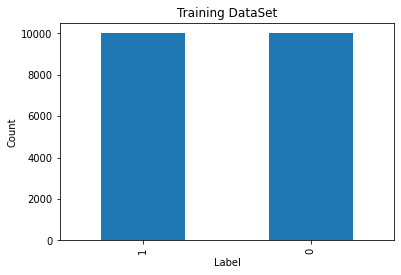

In [23]:
import matplotlib.pyplot as plt
ax = df3['label'].value_counts().plot(kind='bar',
                                    figsize=(6,4), title = 'Training DataSet')
plt.legend
ax.set_xlabel("Label")
ax.set_ylabel("Count")

plt.savefig('label_count.png')
plt.show()

In [24]:
df3.head()

,Statements,label
12239,Bosing concludes that a medieval mindset was n...,1
431,The Marciana came into possession of the histo...,1
14530,Aldous Huxley wrote in 1957 that Goya lacked R...,1
16192,"Michael Kimmelman, a reviewer for The New York...",1
10028,The bands are separated by deep narrow channel...,1


In [25]:
# Processing the final format of training and validation data
# Calling the load_data() function 

(train_texts, train_cats), (dev_texts, dev_cats) = load_data(df3,split=0.8)
train_data = list(zip(train_texts,[{'cats': cats} for cats in train_cats]))
print(train_data[:1])
dev_data = list(zip(dev_texts,[{'cats': cats} for cats in dev_cats]))
print(dev_data[:1])


[('By early 237 BC, after numerous setbacks, the rebels were defeated and their cities brought back under Carthaginian rule. An expedition was prepared to reoccupy Sardinia, where mutinous soldiers had slaughtered all Carthaginians. However, Rome declared that this would be an act of war and occupied both Sardinia and Corsica, in contravention of the recent peace treaty. This has been considered to be the single greatest cause of war with Carthage breaking out again in 218 BC in the Second Punic War.', {'cats': {'POSITIVE': False, 'NEGATIVE': True}})]
[('The cloth is Z-spun (tightly spun) and tabby woven with flax perhaps combined with cotton.', {'cats': {'POSITIVE': True, 'NEGATIVE': False}})]


E:\Sharpest_Mind\WikipediaCitation\src\Notebooks\util.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tuples'] = df.apply(lambda row: (row[df.columns[0]], row[df.columns[1]]), axis=1)


In [26]:
# Converting the dataframe into a list of tuples
# change to dataframe to Spacy format
# wikidata citation needed text
df4 = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/data/processed/csv_files/sort/Citation_needed_wiki.csv', encoding = 'ISO-8859-1')
df4 = shuffle(df4)
df4_1 = df4[df4['label']==1] 
df4_0 = df4[df4['label']==0]
df4_test = pd.concat([df4_1[:2000],df4_0[:2000]])
test1 =df_tolist(df4_test)
test_texts1, test_cats1 = zip(*test1)
test_cats1 = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in test_cats1]
test_data1 = list(zip(test_texts1,[{'cats': cats} for cats in test_cats1]))
print(len(test_data1))


4000


In [27]:
# Converting the dataframe into a list of tuples
# wikidata random articles -biography section
df5 = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/data/processed/csv_files/sort/wiki_data_test.csv', encoding = 'ISO-8859-1')
df5 = shuffle(df5)
df5_1 = df5[df5['Label']==1] 
df5_0 = df5[df5['Label']==0]
df5_test = pd.concat([df5_1[8000:],df5_0[8000:]])
test2 =df_tolist(df5_test)

random.shuffle(test2)

test_texts2, test_cats2 = zip(*test2)
test_cats2 = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in test_cats2]
test_data2 = list(zip(test_texts2,[{'cats': cats} for cats in test_cats2]))
print(len(test_data2))

3980


In [28]:
print(len(train_data))
print(len(test_data1))
print(len(test_data2))
print(len(dev_data))

16000
4000
3980
4000


In [ ]:
# Model 1 - cnn, L2 =2e-5 test1
train_results1, dev_results1, test_results1 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-5, 
                                                     learn_rate = 0.001, n_iter = 3, output_dir='model_artifactnewdatatest1-2e-5')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
17.7957	0.5016	0.4937	0.5000	0.5016	1.0000	0.6681


In [21]:
# Model 2 - cnn, L2 0.0001  test1
train_results2, dev_results2, test_results2 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-5, 
                                                     learn_rate = 0.0001, n_iter = 3, output_dir='model_artifactnewdatatestLR0.0001')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
16.9429	0.8939	0.8557	0.6528	0.9035	0.8817	0.8925
6.8996	0.9615	0.9370	0.6653	0.9762	0.9459	0.9608
2.8630	0.9826	0.9612	0.7004	0.9814	0.9839	0.9826
Saved model to model_artifactnewdatatestLR0.0001


In [23]:
# Model 3 - cnn, L2 2e-3
train_results3, dev_results3, test_results3 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-5, 
                                                     learn_rate = 0.01, n_iter = 3, output_dir='model_artifactnewdatatest1LR0.01')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
16.3958	0.9745	0.9697	0.8692	0.9529	0.9982	0.9751
4.7241	0.9781	0.9740	0.8112	0.9586	0.9994	0.9785
2.6048	0.9792	0.9747	0.7959	0.9619	0.9980	0.9796
Saved model to model_artifactnewdatatest1LR0.01


In [25]:
#dec = decaying(10.0, 1.0, 0.001)
train_results4, dev_results4, test_results4 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-5, 
                                                     learn_rate = 0.001, n_iter =3,  output_dir='model_artifactnewdatatestLRD')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
13.1179	0.9734	0.9617	0.7174	0.9711	0.9758	0.9735
2.6657	0.9860	0.9727	0.6518	0.9745	0.9981	0.9861
1.3675	0.9855	0.9730	0.6706	0.9722	0.9995	0.9857
Saved model to model_artifactnewdatatestLRD


In [27]:
# Model 3 - cnn, L2 2e-3
train_results5, dev_results5, test_results5 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-4, 
                                                     learn_rate = 0.01, n_iter=3,  output_dir='model_artifactnewdatatest1LR0.01L22E-4')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
16.7232	0.9677	0.9665	0.8982	0.9424	0.9962	0.9686
5.5760	0.9684	0.9672	0.8874	0.9422	0.9980	0.9693
3.7195	0.9741	0.9705	0.8759	0.9515	0.9990	0.9747
Saved model to model_artifactnewdatatest1LR0.01L22E-4


In [ ]:
# Model 3 - cnn, L2 2e-3
train_results6, dev_results6, test_results6 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts2, test_cats2, L2 = 2e-3, 
                                                     learn_rate = 0.0001, n_iter=3,  output_dir='model_artifactnewdatatest12')

In [9]:
import matplotlib.pyplot as plt

accuracy_train1 = [(d['textcat_a']) for d in train_results1]
accuracy_dev1 = [(d['textcat_a']) for d in dev_results1]
accuracy_test1 = [(d['textcat_a']) for d in test_results1]
accuracy_train2 = [(d['textcat_a']) for d in train_results2]
accuracy_dev2 = [(d['textcat_a']) for d in dev_results2]
accuracy_test2 = [(d['textcat_a']) for d in test_results2]
accuracy_train3 = [(d['textcat_a']) for d in train_results3]
accuracy_dev3 = [(d['textcat_a']) for d in dev_results3]
accuracy_test3 = [(d['textcat_a']) for d in test_results3]
epochs = range(0,5)
plt.plot(epochs, accuracy_train1, 'c', label='Train model1')
plt.plot(epochs, accuracy_dev1, 'm', label='Val model1')
plt.plot(epochs, accuracy_test1, 'y', label='Test model1')
plt.plot(epochs, accuracy_train2, 'b', label='Train model2')
plt.plot(epochs, accuracy_dev2, 'g', label='Val model2')
plt.plot(epochs, accuracy_test2, 'r', label='Test model2')
plt.plot(epochs, accuracy_train3, 'k', label='Train model2')
plt.plot(epochs, accuracy_dev3, color='orange', label='Val model2')
plt.plot(epochs, accuracy_test3, color='pink', label='Test model2')
plt.title('Training Validation and Test Accuracy \n Model 1: L2= 2e-5, Model 2 : L2 =2e-4, Model 3 : L3 =2e-3' )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

NameError: name 'train_results1' is not defined

In [ ]:
import matplotlib.pyplot as plt

accuracy_train1 = [(d['textcat_a']) for d in train_results1]
accuracy_dev1 = [(d['textcat_a']) for d in dev_results1]
accuracy_test1 = [(d['textcat_a']) for d in test_results1]

epochs = range(0,5)
plt.plot(epochs, accuracy_train1, 'g', label='Train')
plt.plot(epochs, accuracy_dev1, 'k', label='Val')
plt.plot(epochs, accuracy_test1, 'b', label='Test')

plt.title('Training, Validation and Test Accuracy : LR2=2e-5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
accuracy_train2 = [(d['textcat_a']) for d in train_results2]
accuracy_dev2 = [(d['textcat_a']) for d in dev_results2]
accuracy_test2 = [(d['textcat_a']) for d in test_results2]
epochs = range(0,5)
plt.plot(epochs, accuracy_train2, 'r', label='Train')
plt.plot(epochs, accuracy_dev2, 'c', label='Val')
plt.plot(epochs, accuracy_test2, 'y', label='Test')
plt.title('Training, Validation and Test Accuracy  Model2 L2= 2e-4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
accuracy_train3 = [(d['textcat_a']) for d in train_results3]
accuracy_dev3 = [(d['textcat_a']) for d in dev_results3]
accuracy_test3 = [(d['textcat_a']) for d in test_results3]
epochs = range(0,5)
plt.plot(epochs, accuracy_train3, 'r', label='Train')
plt.plot(epochs, accuracy_dev3, 'c', label='Val')
plt.plot(epochs, accuracy_test3, 'y', label='Test')
plt.title('Training and Validation Accuracy  Model3 L2= 2e-3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

precision_test1 = [(d['textcat_p']) for d in test_results1]
precision_test2 = [(d['textcat_p']) for d in test_results2]
precision_test3 = [(d['textcat_p']) for d in test_results3]
#precision_test4 = [(d['textcat_p']) for d in test_result4]

epochs = range(0,5)
plt.plot(epochs, precision_test1, 'g', label='L2=2e-5')
plt.plot(epochs, precision_test2, 'b', label='L2=2e-4')
plt.plot(epochs, precision_test3, 'r', label='L2=2e-3')
#plt.plot(epochs, precision_test4, 'c', label='4')
plt.title('Test precision')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

precision_test1 = [(d['textcat_a']) for d in test_results1]
precision_test2 = [(d['textcat_a']) for d in test_results2]
precision_test3 = [(d['textcat_a']) for d in test_result3]
precision_test4 = [(d['textcat_a']) for d in test_result4]

epochs = range(0,5)
plt.plot(epochs, precision_test1, 'g', label='1')
plt.plot(epochs, precision_test2, 'b', label='2')
plt.plot(epochs, precision_test3, 'r', label='3')
plt.plot(epochs, precision_test4, 'c', label='4')
plt.title('Test accuracy ')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()

In [33]:
import spacy
# Testing the model = https://en.wikipedia.org/wiki/Che_Guevara - positive sentence
loaded_model = spacy.load('E:/Sharpest_Mind/WikipediaCitation/src/Notebooks/model_artifactnewdatatest1LR0.01L22E-4')
test_text= "Such positions also allowed him to play a central role in training the militia forces who repelled the Bay of Pigs Invasion and bringing the Soviet nuclear-armed ballistic missiles to Cuba which precipitated the 1962 Cuban Missile Crisis "
doc=loaded_model(test_text)
doc.cats

{'POSITIVE': 0.6063688397407532, 'NEGATIVE': 0.3936311900615692}

In [ ]:
spacy.displacy.render(doc, style='ent')

In [32]:
# Testing the model - negative sentences
test_text="Later, during the Age of Exploration, maps became progressively more accurate for navigation needs and were often sprinkled with sketches and drawings such as sailing ships showing the direction of trade winds, little trees and mounds to represent forests and mountains and of course, plenty of sea creatures and exotic natives much of them imaginary. "
doc=loaded_model(test_text)
doc.cats

{'POSITIVE': 0.8592894673347473, 'NEGATIVE': 0.14071056246757507}

In [30]:
# Testing the model - negative sentence
test_text="Later, during the Age of Exploration, maps became progressively more accurate for navigation needs and were often sprinkled with sketches and drawings such as sailing ships showing the direction of trade winds, little trees and mounds to represent forests and mountains and of course, plenty of sea creatures and exotic natives much of them imaginary. "
doc=loaded_model(test_text)
doc.cats

{'POSITIVE': 0.08235668390989304, 'NEGATIVE': 0.9176433086395264}

In [31]:
#positive sentence 

test_text1 = 'Anthropomorphic maps date back to when Sebastian Münster used a queen to depict Europe in 1570.'
doc=loaded_model(test_text1)
doc.cats

{'POSITIVE': 0.998930037021637, 'NEGATIVE': 0.0010699756676331162}

In [ ]:
#positive sentence 

test_text = 'The leading panoramic map artists in the U.S.A. were Herman Brosius, Camille N. Drie, Thaddeus Mortimer Fowler, Paul Giraud, Augustus Koch, D. D. Morse, Henry Welge, and A. L. Westyard.'
doc=nlp(test_text)
doc.cats